In [24]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [25]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [26]:
df.shape

(1000, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [28]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [29]:
df.describe(include='object')

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST001,Female,Clothing
freq,11,1,510,351


In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Day,Month,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,11,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,1,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,5,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,6,5,2023


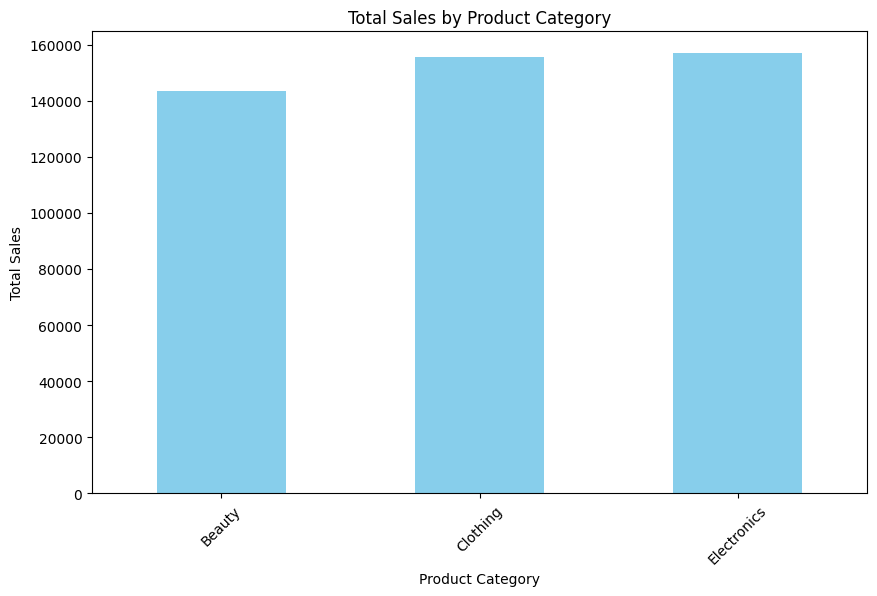

In [31]:
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()

sales_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

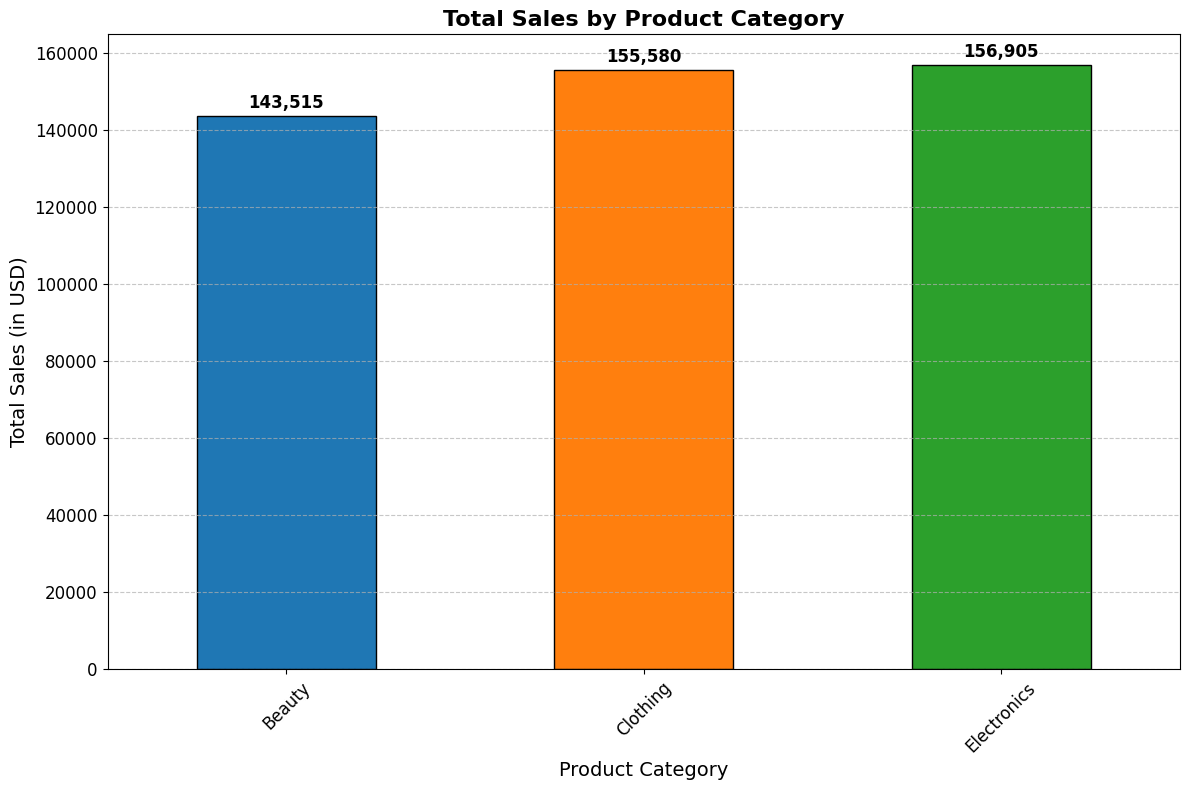

In [32]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
sales_by_category.plot(kind='bar', color=colors, figsize=(12, 8), edgecolor='black')

plt.title('Total Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(sales_by_category):
    plt.text(index, value + 2000, f'{value:,}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

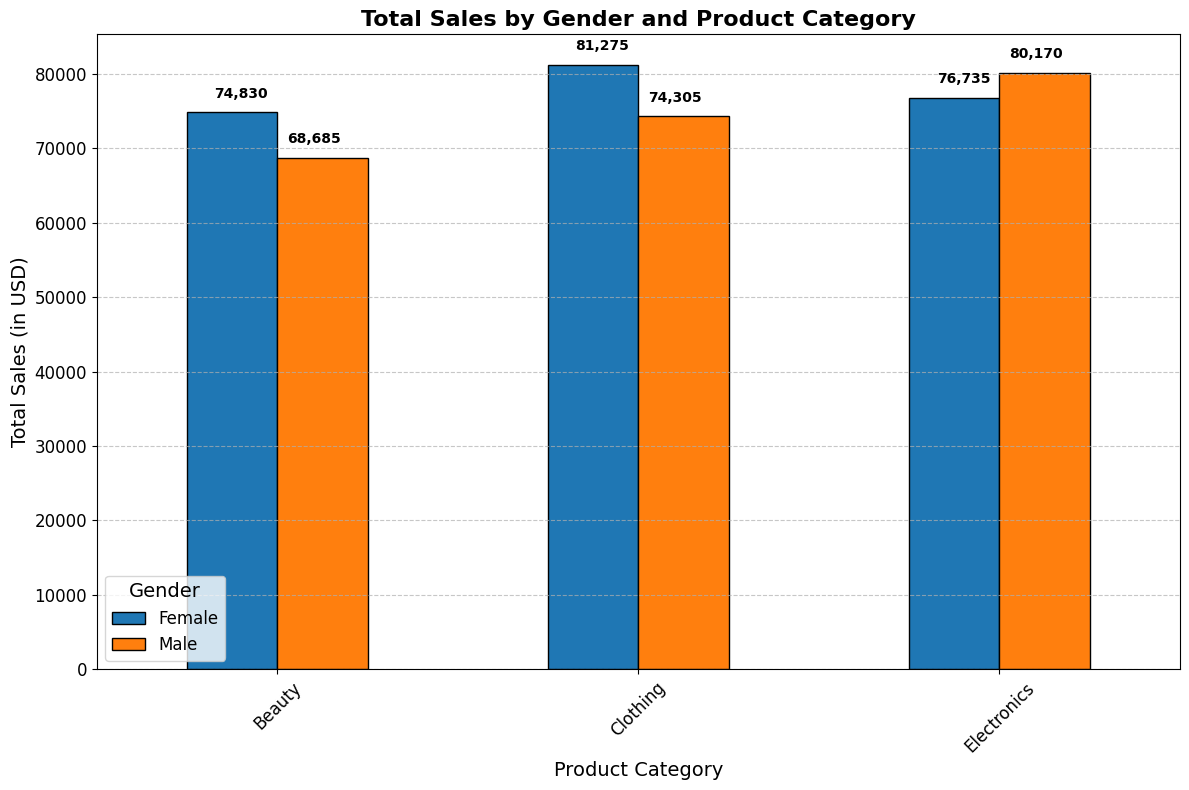

In [33]:
gender_sales_by_category = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()

gender_sales_by_category.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], figsize=(12, 8), edgecolor='black')

plt.title('Total Sales by Gender and Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, category in enumerate(gender_sales_by_category.index):
    for j, gender in enumerate(gender_sales_by_category.columns):
        value = gender_sales_by_category.loc[category, gender]
        if value > 0:  
            plt.text(i + j * 0.2 - 0.1, value + 2000, f'{value:,}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [34]:
group4['Month'] = pd.Categorical(group4['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

group4 = group4.sort_values('Month')

plt.figure(figsize=(14, 8))
sns.barplot(data=group4, x='Month', y='Total Amount', hue='Product Category', palette=colors)

plt.title('Total Sales by Month and Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales (in USD)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Product Category', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

NameError: name 'group4' is not defined

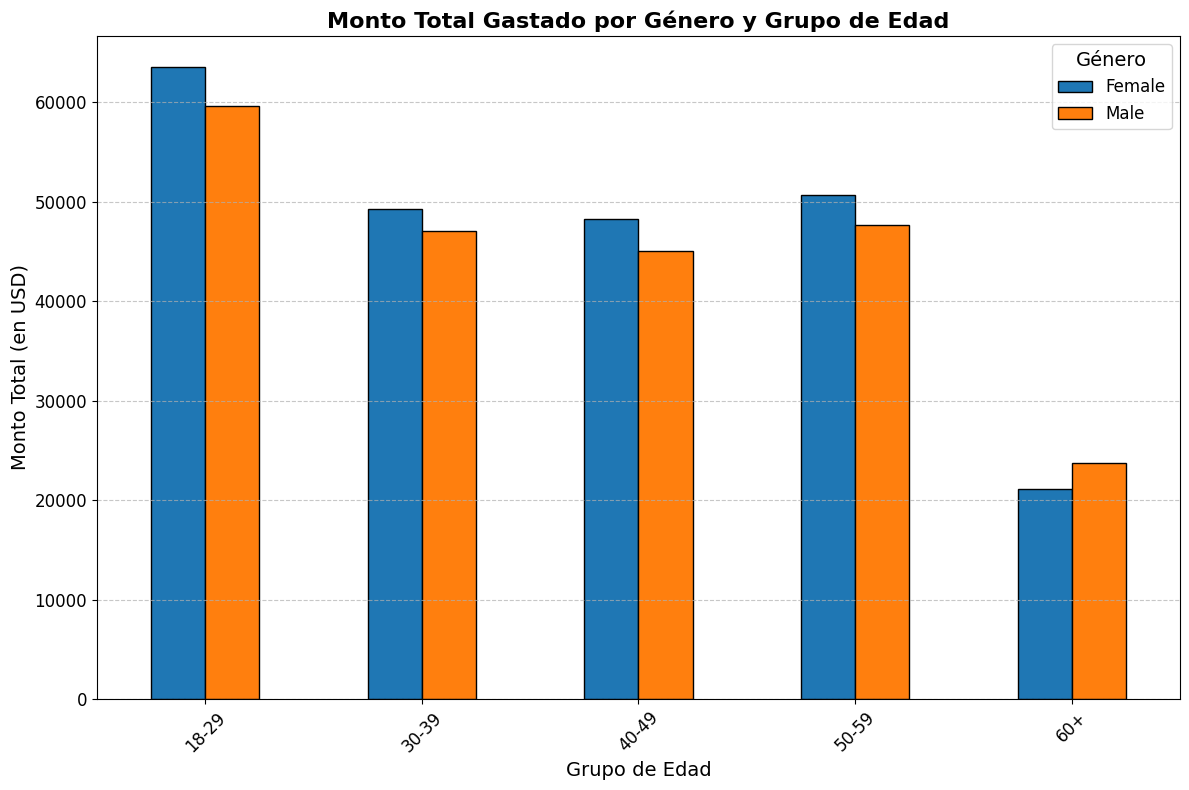

In [ ]:
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_gender_sales = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum().unstack()

age_gender_sales.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.title('Total Amount Spent by Gender and Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Total Amount (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

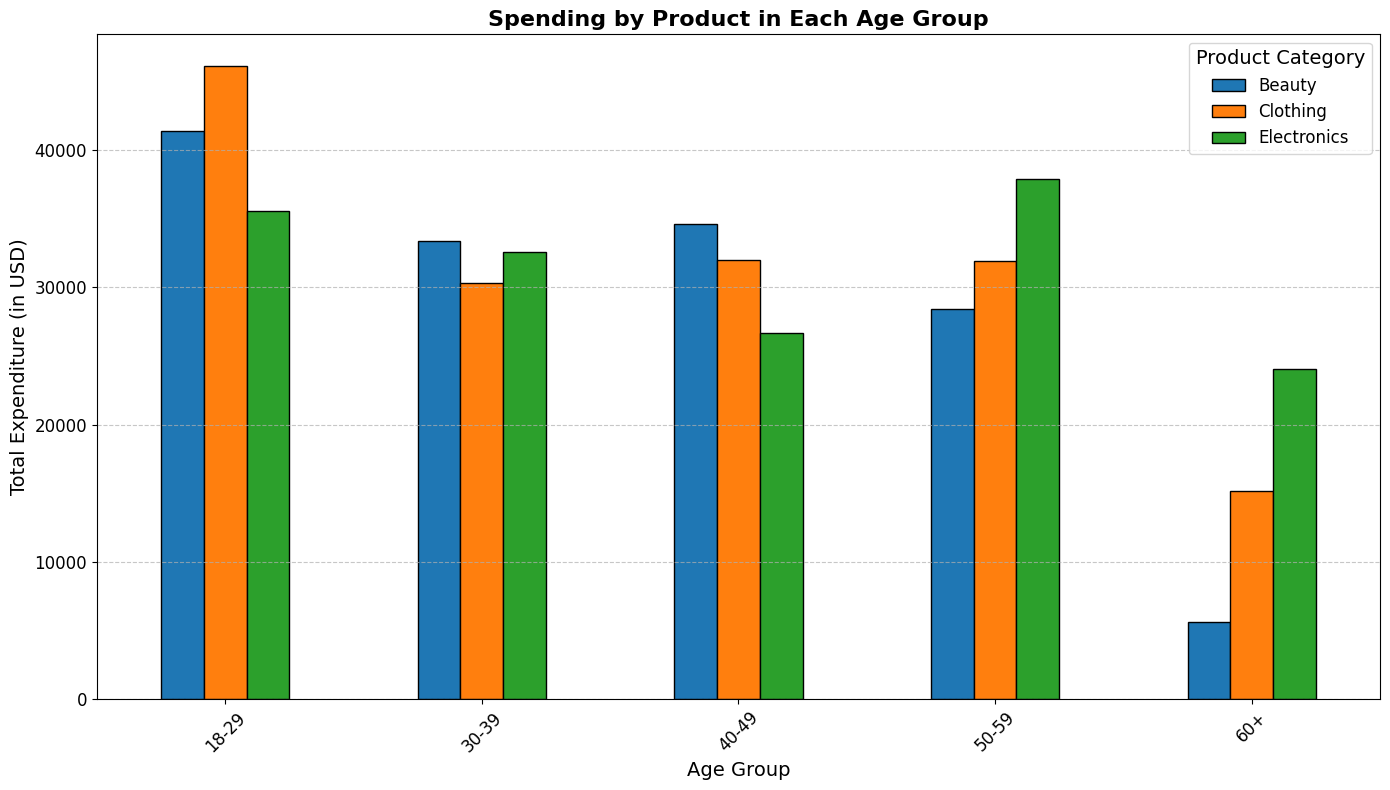

In [ ]:

age_group_product_sales.plot(kind='bar', figsize=(14, 8), color=colors, edgecolor='black')

plt.title('Spending by Product in Each Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Total Expenditure (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Product Category', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()